In [1]:
import sys
import pandas as pd
import numpy as np

# Define a random seed for reproducibility
seed = 0
np.random.seed(seed)

import sklearn
import xgboost
import keras
import tensorflow as tf

import os
import pickle


print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('XGBoost: {}'.format(xgboost.__version__))
print('Keras: {}'.format(keras.__version__))

C:\Users\brend\.conda\envs\NSQIP\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.


Python: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.3
Numpy: 1.18.1
Sklearn: 0.22.1
XGBoost: 1.1.1
Keras: 2.3.1


In [2]:
def load_train_and_test(path):

    """Loads training features, training labels, testing features, and testing features
    Parameters:
        path (str) -- a single directory path containing all four datasets
    """

    train_features = pd.read_csv(path + 'train_features.csv', index_col=0)
    train_labels = pd.read_csv(path + 'train_labels.csv', index_col=0)
    test_features = pd.read_csv(path + 'test_features.csv', index_col=0)
    test_labels = pd.read_csv(path + 'test_labels.csv', index_col=0)

    return train_features, train_labels.values.ravel(), test_features, test_labels.values.ravel()

X_train, Y_train, X_test, Y_test = load_train_and_test('../data/split/')

In [3]:
from sklearn.metrics import roc_auc_score

def permutation_importance(X, y, model): 
    
    """ Add random permutations to each variable in training data to assess variable importance """
    
    perm = {}
    y_true = model.predict_proba(X)[:,1]
    baseline= roc_auc_score(y, y_true)
    
    print('Baseline ROC AUC score: {}'.format(baseline))

    for cols in X.columns:
        new_df = X.copy()
        values = new_df.loc[:,cols]
        new_df.loc[:,cols] = np.random.permutation(values)
        y_true = model.predict_proba(new_df)[:,1]
        perm[cols] = roc_auc_score(y, y_true) - baseline
        
    return perm

In [4]:
# load all optimized models from the models folder

dirName = '../models/'

fileList = list()
dirList = list()

for (dirpath, dirnames, filenames) in os. walk(dirName):
    for file in filenames:
        if '.sav' in file:
            fileList.append(os.path. join(dirpath, file))

modelList = list()

for file in fileList:
    model = pickle.load(open(file, 'rb'))
    modelList.append(model)

In [5]:
# run permutation analysis for each variable and each model

permutations = []

for i,model in enumerate(modelList):
    perms = permutation_importance(X_train.copy(), Y_train.copy(), model)
    permutations.append(perms)
    
scores = pd.DataFrame(permutations, index = [file.split('/')[-1].rstrip('.sav') for file in fileList])
scores

Baseline ROC AUC score: 0.637720083557147
Baseline ROC AUC score: 0.7054878375379718
Baseline ROC AUC score: 0.5729671204156432
Baseline ROC AUC score: 0.7442784013956798
Baseline ROC AUC score: 1.0
Baseline ROC AUC score: 0.77980549242859
Baseline ROC AUC score: 0.7178951556749229
Baseline ROC AUC score: 0.9966332285043118


,SEX_male,RACE_NEW_American_Indian_or_Alaska_Native,RACE_NEW_Asian,RACE_NEW_Black_or_African_American,RACE_NEW_Native_Hawaiian_or_Pacific_Islander,RACE_NEW_Unknown_Not_Reported,RACE_NEW_White,ETHNICITY_HISPANIC_N,ETHNICITY_HISPANIC_U,ETHNICITY_HISPANIC_Y,...,TOTHLOS,PRSODM,PRBUN,PRCREAT,PRALBUM,PRPLATE,PRPTT,PRINR,PRPT,BMI
AdaBoost,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.015487,-0.047391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DecisionTree,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.003772,-0.074758,0.000000,0.000000,0.000000,0.000000,-0.061141,0.000000,0.000000,0.000000
GradientBoosting,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.070817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LogisticRegression,-0.008792,-0.007361,-0.008930,-4.384455e-03,-0.000207,-0.008004,-0.017874,0.000681,-0.004469,0.001232,...,-0.022297,-0.021157,-0.033821,-0.001959,0.000107,-0.000796,-0.015610,-0.009251,-0.000490,-0.000513
MLP,-0.017821,-0.000689,-0.000459,-9.289229e-03,0.000000,-0.003703,-0.016964,-0.007950,-0.001347,-0.004277,...,-0.009106,-0.074918,-0.029207,-0.059814,-0.037953,-0.056761,-0.020147,-0.012916,-0.018946,-0.035451
RandomForest,0.001018,0.000000,0.000428,1.110223e-16,0.000000,-0.001071,-0.001316,-0.000451,0.000000,0.000000,...,-0.009932,-0.038182,-0.023697,-0.002502,-0.008731,-0.008080,-0.030355,-0.014079,0.000000,-0.015334
SVC,-0.002502,-0.005402,0.002035,5.815333e-04,-0.000107,-0.006014,-0.001423,0.001255,0.002043,0.005854,...,-0.011332,0.002533,-0.023162,0.002915,0.000145,-0.003665,-0.012549,-0.003191,0.004599,0.000474
XGBoost,-0.002808,-0.000008,-0.000383,-1.874680e-03,0.000000,-0.001224,-0.000298,-0.001331,-0.000612,-0.000015,...,-0.010613,-0.016597,-0.010605,-0.009664,-0.004270,-0.021999,-0.013857,-0.005616,-0.000222,-0.053425


In [161]:
# print total permutation values for all optimized models

# Note - more negative values mean the algorithm was impacted significantly by permutations of this column (ie, this column is an important variable)
# Note - positive values may indicate the algorithm's performance is decreased by inclusion of this variable. 

totals = scores.mean(axis=0)
totals.sort_values()

RETURNOR_Yes                                             -0.056870
PRSODM                                                   -0.033809
PRPTT                                                    -0.019207
TOTHLOS                                                  -0.019170
PRBUN                                                    -0.015062
BMI                                                      -0.013031
PRPLATE                                                  -0.011413
ASACLAS_3_Severe_Disturb                                 -0.010777
PRCREAT                                                  -0.008878
OPTIME                                                   -0.006990
PRALBUM                                                  -0.006338
PRINR                                                    -0.005632
RACE_NEW_White                                           -0.004735
SMOKE_Yes                                                -0.004587
SEX_male                                                 -0.00

In [162]:
# Print top 10 most important variables
totals.sort_values()[:10]

RETURNOR_Yes               -0.056870
PRSODM                     -0.033809
PRPTT                      -0.019207
TOTHLOS                    -0.019170
PRBUN                      -0.015062
BMI                        -0.013031
PRPLATE                    -0.011413
ASACLAS_3_Severe_Disturb   -0.010777
PRCREAT                    -0.008878
OPTIME                     -0.006990
dtype: float64

In [163]:
data = totals.sort_values(ascending=False) * -1

In [195]:
import matplotlib.pyplot as plt

def plot_bar_score(scores, tree=True, offset=0.002, save=False):
    
    pos = np.arange(len(scores))

    plt.figure(figsize=(10,14))
    rects = plt.barh(pos, scores,
                     align='center',
                     height = 0.9,
                     tick_label = scores.keys(),
                     alpha = 0.5
                    )
    
    for rect in rects:
        plt.text(rect.get_width() + offset, rect.get_y(), round(rect.get_width(),3), ha='center', va='bottom')
        
    if tree:
        plt.title("Average Impurity-Based Feature Importance for Tree Algorithms")
    else:
        plt.title("Feature Importance: Average Decrease in AUC Score in Permutation Analysis")
        
    plt.xlim(np.min(scores) - offset, np.max(scores) + offset*2)
    
    #plt.tight_layout()
    
    if save:
        plt.savefig('../reports/figures/{}_bar_graph.png'.format('feature_importance'))
    plt.show

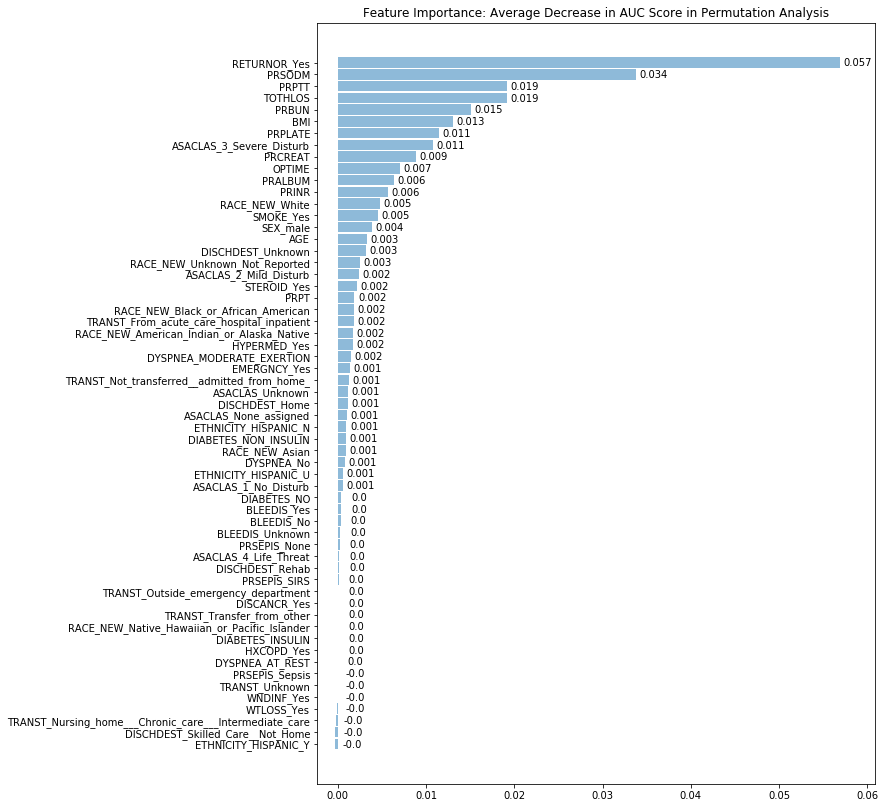

In [196]:
plot_bar_score(data, tree=False, save=True)

In [197]:
# using impurity-based feature importance from tree based approachs
importance = pd.DataFrame(columns=X_train.columns)
stds = pd.DataFrame(columns=X_train.columns)

i=0
for model in modelList:
     
    if hasattr(model, 'feature_importances_'):
        importance.loc[i] = model.feature_importances_
        i += 1

In [198]:
totals = importance.mean(axis=0).sort_values(ascending=True)

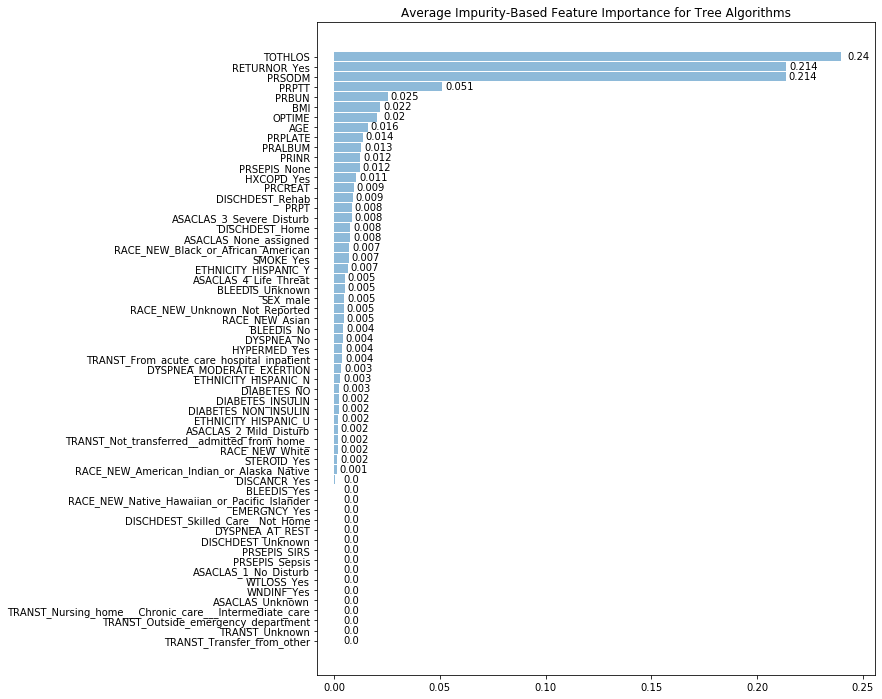

In [192]:
plot_bar_score(totals, offset=0.008, a)